In [2]:
import pygimli as pg
from pygimli.physics import Refraction

Removed 47 values.
Data: Sensors: 48 data: 720


C:\Software\Anaconda5.3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


(<matplotlib.axes._subplots.AxesSubplot at 0x20c9e1b7a90>,
 <matplotlib.colorbar.Colorbar at 0x20c9e221ba8>)

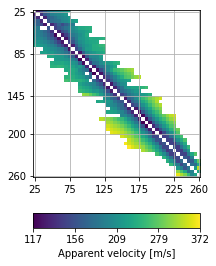

In [4]:
ra = Refraction('Seism_NMO.txt')
ra.showVA()

In [5]:
ra.invert()
ra.showResult(rays=True)  # this works well

(<matplotlib.axes._subplots.AxesSubplot at 0x20cab0882e8>,
 <matplotlib.colorbar.Colorbar at 0x20cadf465c0>)

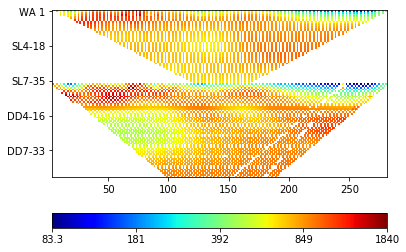

In [14]:
import pybert as pb
from pybert.importer import importRes2dInv
data = importRes2dInv('DD_WS_data_filtered.txt')
pb.show(data)
data.save('notopo.dat')

In [17]:
import numpy as np
x, z = np.loadtxt('ERT_Topo.txt', unpack=True, delimiter=',')

In [19]:
ex = pg.x(data)
ez = np.interp(ex, x, z)
for i in range(data.sensorCount()):
    data.setSensorPosition(i, [ex[i], ez[i]])

In [20]:
ert = pb.Resistivity(data)
ert.invert()  # maxIter=0 to speed things up

03/05/19 - 17:10:12 - pyGIMLi - INFO - estimate data error


creating mesh...
Mesh: Nodes: 1756 Cells: 3176 Boundaries: 4931
Mesh: Nodes: 1756 Cells: 3176 Boundaries: 4931


(<matplotlib.axes._subplots.AxesSubplot at 0x20cacb98a90>,
 <matplotlib.colorbar.Colorbar at 0x20cace80550>)

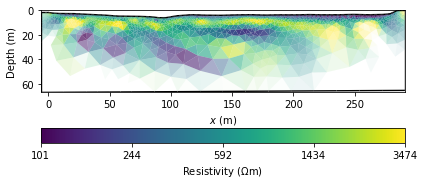

In [21]:
ert.showResult()

Removed 47 values.
Data: Sensors: 48 data: 720


(<matplotlib.axes._subplots.AxesSubplot at 0x20caced5e80>,
 <matplotlib.colorbar.Colorbar at 0x20cad1e7080>)

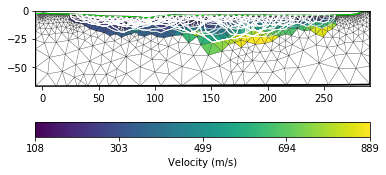

In [25]:
pd = ert.paraDomain
for c in pd.cells():
    c.setMarker(1)
ra = Refraction('Seism_NMO.txt')
ra.setMesh(pd)
ra.invert()
ra.showResult(rays=True)